In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, cluster, mixture

n_samples = 1000

data = datasets.make_blobs(n_samples = n_samples,
                           random_state = 4,
                           cluster_std = [5,1,0.5])
X ,y = data[0], data[1]

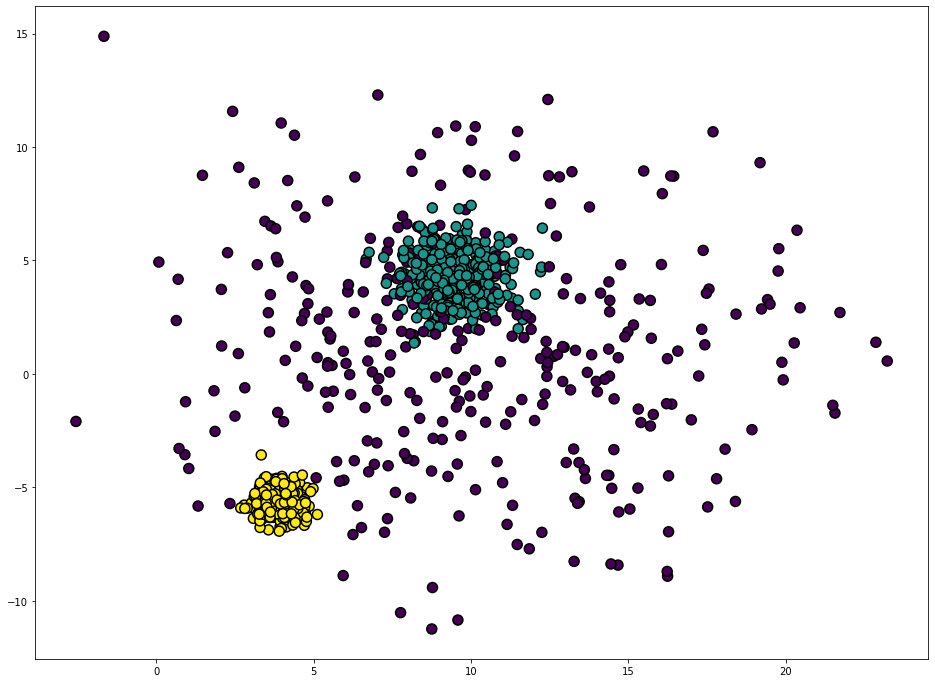

In [3]:
plt.figure(figsize = (16,12))
plt.scatter(X[:,0], X[:,1], c = y, edgecolor = 'black', lw = 1.5, s = 100, cmap = plt.get_cmap('viridis'))
plt.show()

# K-Means

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
pred = kmeans.fit_predict(X)

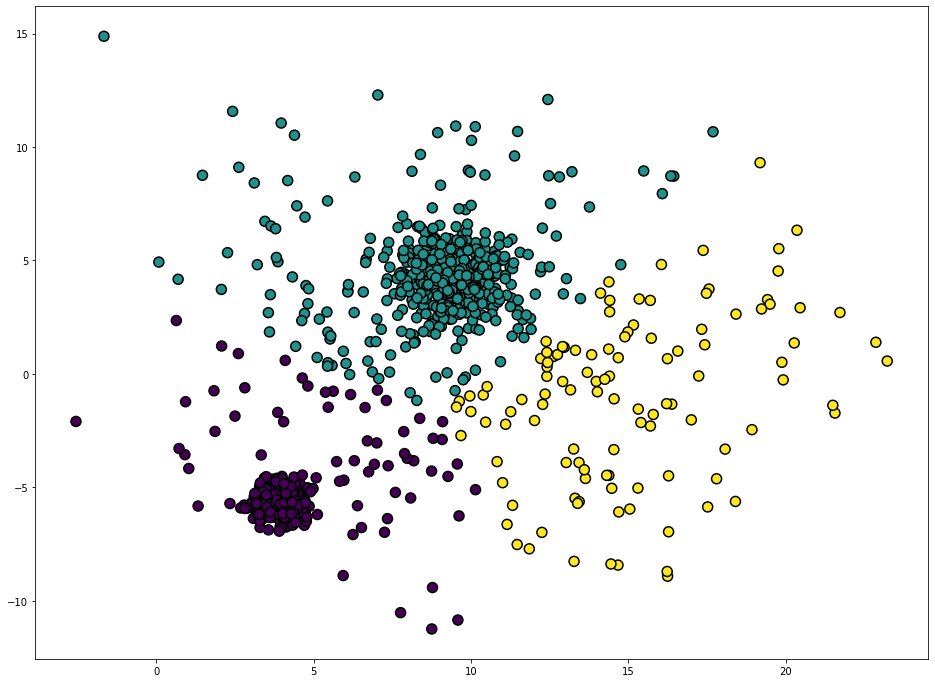

In [6]:
plt.figure(figsize = (16,12))
plt.scatter(X[:,0], X[:,1], c = pred , edgecolor = 'black', lw = 1.5, s = 100 , cmap = plt.get_cmap('viridis'))
plt.show()

# GMM Clustering

In [14]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3)

gmm = gmm.fit(X)

gmm_pred = gmm.predict(X)

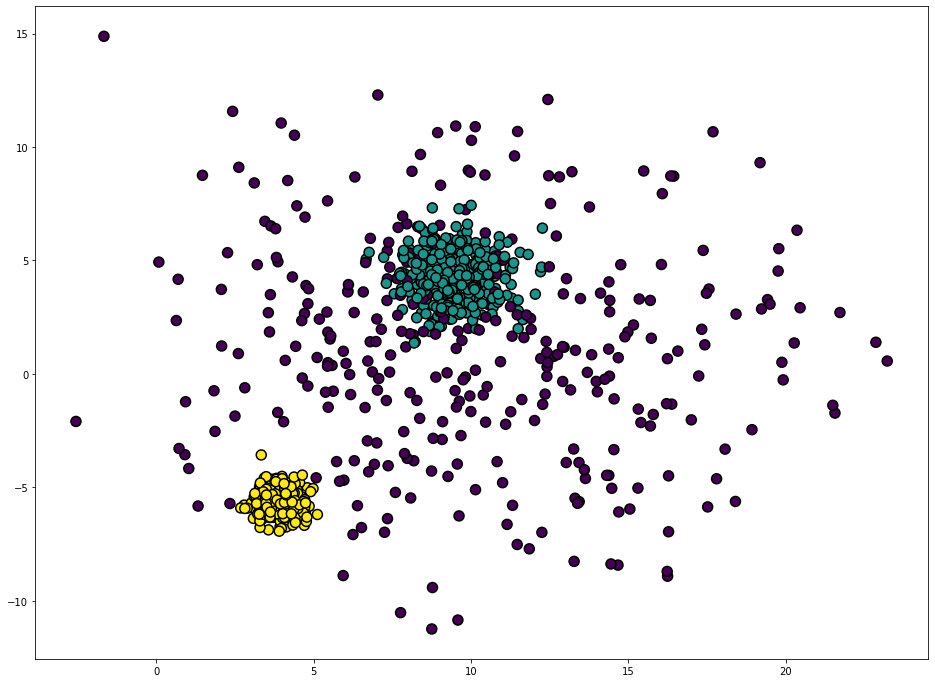

In [12]:
plt.figure(figsize = (16,12))
plt.scatter(X[:,0], X[:,1] , c=y, edgecolor = 'black',lw = 1.5, s = 100 , cmap = plt.get_cmap('viridis'))

# Kmeans VS GMM on iris dataset

In [16]:
import seaborn as sns

iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


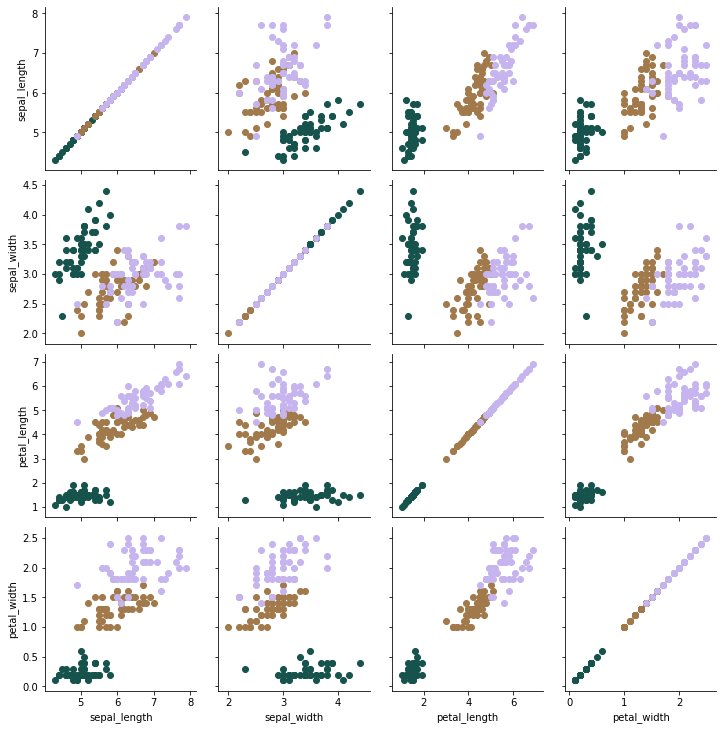

In [20]:
g = sns.PairGrid(iris, hue = 'species', palette=sns.color_palette("cubehelix", 3),vars = ['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [28]:
kmeans_iris = KMeans(n_clusters = 3)
kmeans_pred_iris  = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])
iris['kmeans_pred'] = kmeans_pred_iris

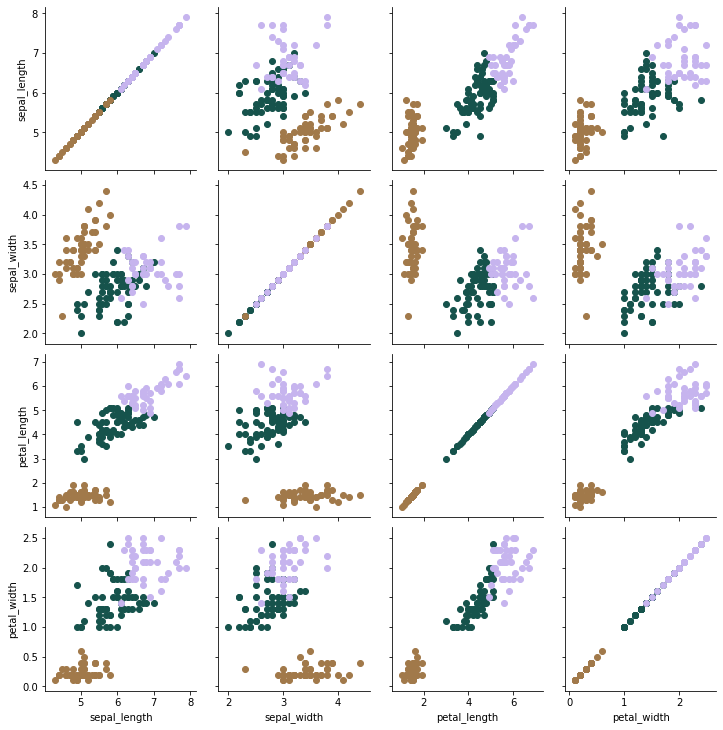

In [29]:
g = sns.PairGrid(iris, hue = 'kmeans_pred', palette=sns.color_palette("cubehelix", 3),vars = ['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

## Caluclating adjusted Rand Score as it is impossible to visually inspect all data

In [30]:
from sklearn.metrics import adjusted_rand_score

iris_kmeans_score = adjusted_rand_score(iris['species'],iris['kmeans_pred'])
iris_kmeans_score

0.7302382722834697

In [32]:
gmm_iris = GaussianMixture(n_components = 3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
gmm_iris_pred = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [34]:
iris['gmm_pred'] = gmm_iris_pred

gmm_score = adjusted_rand_score(iris['species'], iris['gmm_pred'])
gmm_score

0.9038742317748124